# US RainFall Prediction project Using the RandomForestClassifier

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
import sklearn

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.preprocessing import StandardScaler

In [22]:
import warnings

In [24]:
warnings.filterwarnings("ignore")

## importing the dataset

In [10]:
df = pd.read_csv("C:/Users/Harsha Vardhan/Downloads/usa_rain_prediction_dataset_2024_2025.csv")

In [11]:
df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [12]:
df.shape

(73100, 9)

In [13]:
df.isnull().sum()

Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

In [14]:
df.tail()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1
73099,2025-12-31,Washington D.C.,54.648609,80.812021,22.722505,0.151903,19.674960,974.835534,0


In [16]:
df["Location"].value_counts()

Location
New York           3655
Los Angeles        3655
Denver             3655
Seattle            3655
San Francisco      3655
Charlotte          3655
Indianapolis       3655
Columbus           3655
Fort Worth         3655
Jacksonville       3655
Austin             3655
San Jose           3655
Dallas             3655
San Diego          3655
San Antonio        3655
Philadelphia       3655
Phoenix            3655
Houston            3655
Chicago            3655
Washington D.C.    3655
Name: count, dtype: int64

In [19]:
#visualizing the data

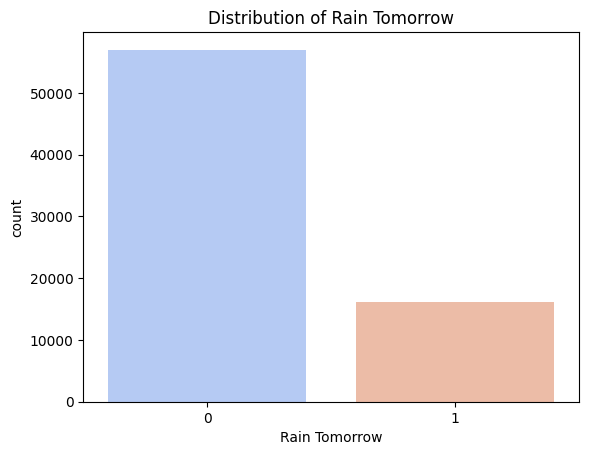

In [25]:
sns.countplot(x='Rain Tomorrow', data=df, palette='coolwarm')
plt.title('Distribution of Rain Tomorrow')
plt.show()

In [26]:
# visualizing using the pairplot

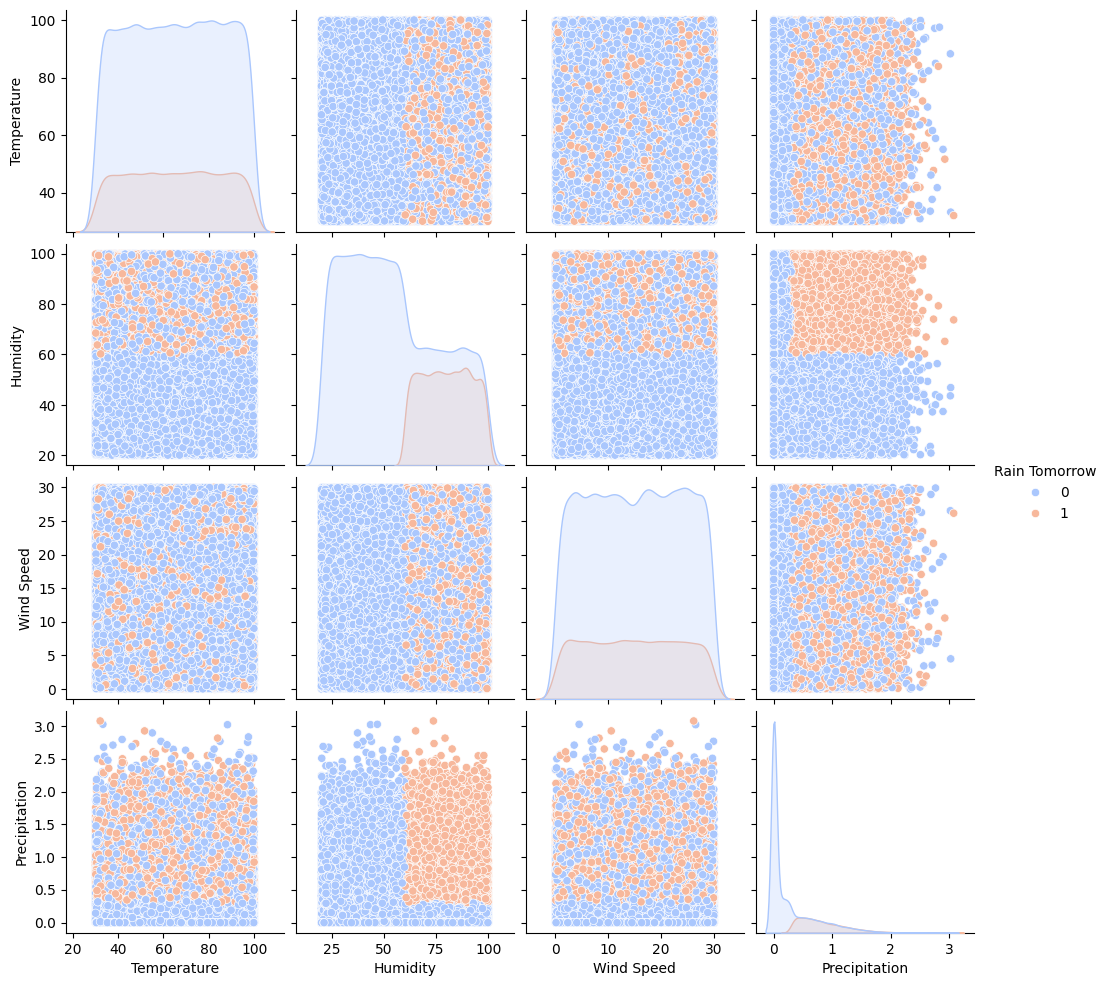

In [33]:
sns.pairplot(df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Rain Tomorrow']], hue='Rain Tomorrow', palette='coolwarm')
plt.show()

In [17]:
# label encoding the location in USA

In [18]:
from sklearn.preprocessing import LabelEncoder

In [28]:
loc_encode = LabelEncoder()

In [29]:
df["Location"] = loc_encode.fit_transform(df["Location"])

In [31]:
df["Location"].value_counts()

Location
11    3655
10    3655
5     3655
18    3655
16    3655
1     3655
8     3655
3     3655
6     3655
9     3655
0     3655
17    3655
4     3655
15    3655
14    3655
12    3655
13    3655
7     3655
2     3655
19    3655
Name: count, dtype: int64

In [32]:
df.describe()

,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,9.500000,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,5.766321,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,0.000000,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,4.750000,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,9.500000,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,14.250000,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,19.000000,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


In [34]:
df.columns

Index(['Date', 'Location', 'Temperature', 'Humidity', 'Wind Speed',
       'Precipitation', 'Cloud Cover', 'Pressure', 'Rain Tomorrow'],
      dtype='object')

In [53]:
# to check the distribution of data in the Rain Tomorrow or target Column

In [54]:
df['Rain Tomorrow'].value_counts()

Rain Tomorrow
0    56988
1    16112
Name: count, dtype: int64

In [60]:
# Over sampling of the 1 Target Value

In [55]:
val_0 ,val_1 = df["Rain Tomorrow"].value_counts()


In [57]:
val_0
# it implies carrying the 0 values count

56988

In [59]:
val_1
# it carries the 1 values count

16112

In [ ]:
# divide by class 

In [61]:
df_class_0 = df[df["Rain Tomorrow"] == 0]
df_class_1 = df[df["Rain Tomorrow"] == 1]


In [62]:
#duplication of rows

In [63]:
df_oversample_1 = df_class_1.sample(val_0,replace=True)

In [64]:
new_df = pd.concat([df_class_0,df_oversample_1],axis=0)

In [65]:
new_df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,11,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,11,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
3,2024-01-04,11,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,11,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
5,2024-01-06,11,35.298648,56.598099,21.442424,0.582661,22.825103,1036.043397,0


In [66]:
new_df.shape

(113976, 9)

In [67]:
new_df['Rain Tomorrow'].value_counts()

Rain Tomorrow
0    56988
1    56988
Name: count, dtype: int64

In [36]:
#Divide the dataframe into features and target

In [116]:
x =new_df[['Temperature', 'Humidity', 'Wind Speed',
       'Precipitation', 'Cloud Cover', 'Pressure']]
y = new_df['Rain Tomorrow']

In [117]:
x.shape

(113976, 6)

In [118]:
# standardizing the Data

In [119]:
scaler = StandardScaler()

In [120]:
x = scaler.fit_transform(x)

In [121]:
x

array([[ 1.10615506,  0.39396461,  1.5457579 , -1.09934171,  0.56371217,
         1.03342988],
       [ 0.89473476, -1.74851001, -0.29176984, -0.03995155, -0.51329949,
        -0.45332733],
       [ 0.63888875, -0.33246432,  0.51589451, -0.91010837, -0.09286125,
        -1.29143467],
       ...,
       [-0.27221707,  0.81600353, -0.26216717,  2.3453344 ,  0.18427355,
        -0.46273584],
       [ 0.21783642,  0.71507555, -1.13823531, -0.35146356, -0.40411989,
         1.51917054],
       [ 0.15076548,  0.4071889 , -0.84449834, -0.33144901,  1.67014111,
        -0.71763937]])

In [122]:
y

0        0
1        0
3        0
4        0
5        0
        ..
71946    1
26293    1
47990    1
65997    1
13559    1
Name: Rain Tomorrow, Length: 113976, dtype: int64

In [123]:
# splitting into training and testing set

In [124]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 5)

In [125]:
x_train.shape

(91180, 6)

In [126]:
x_test.shape

(22796, 6)

In [127]:
y_train.shape

(91180,)

In [128]:
y_test.shape

(22796,)

In [129]:
# Building the Model for Prediction

In [130]:
model = RandomForestClassifier()

In [131]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [132]:
y_pred = model.predict(x_test)

In [133]:
model.score(x_test,y_test)

1.0

In [134]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [135]:
print("Accuracy score :",accuracy_score(y_test,y_pred))

Accuracy score : 1.0


In [136]:
print("classification_report:",classification_report(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11409
           1       1.00      1.00      1.00     11387

    accuracy                           1.00     22796
   macro avg       1.00      1.00      1.00     22796
weighted avg       1.00      1.00      1.00     22796



In [104]:
cor = confusion_matrix(y_test,y_pred)

In [105]:
cor

array([[11409,     0],
       [    0, 11387]], dtype=int64)

In [106]:
#visualizing the results using the heatmap

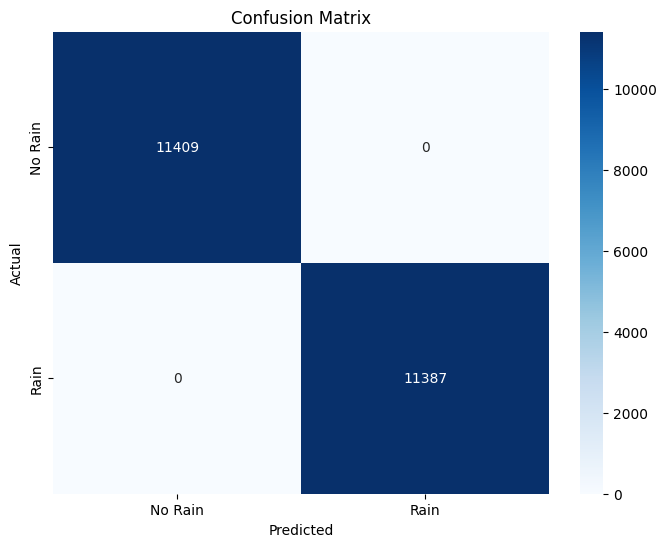

In [112]:
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [113]:
# Buildig the model for userinput